In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

# Определение перспективного тарифа для телекомпании

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание тарифов</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Изучение общей информации</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Работа-с-пропусками-и-ошибками" data-toc-modified-id="Работа-с-пропусками-и-ошибками-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Работа с пропусками и ошибками</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Подсчет-индивидуальных-характеристик-для-каждого-пользователя" data-toc-modified-id="Подсчет-индивидуальных-характеристик-для-каждого-пользователя-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подсчет индивидуальных характеристик для каждого пользователя</a></span></li><li><span><a href="#Изучение-поведения-клиентов" data-toc-modified-id="Изучение-поведения-клиентов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение поведения клиентов</a></span></li></ul></li><li><span><a href="#Проверка-гипотезы" data-toc-modified-id="Проверка-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотезы</a></span><ul class="toc-item"><li><span><a href="#Гипотеза-1" data-toc-modified-id="Гипотеза-1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Гипотеза 1</a></span></li><li><span><a href="#Гипотеза-2" data-toc-modified-id="Гипотеза-2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Гипотеза 2</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта
Клиентам оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

### Описание тарифов  
**Тариф «Смарт»** 
1. Ежемесячная плата: 550 рублей  
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:  
  - минута разговора: 3 рубля  
  - сообщение: 3 рубля  
  - 1 Гб интернет-трафика: 200 рублей  

**Тариф «Ультра»**    
1. Ежемесячная плата: 1950 рублей  
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
3. Стоимость услуг сверх тарифного пакета:  
  - минута разговора: 1 рубль  
  - сообщение: 1 рубль  
  - 1 Гб интернет-трафика: 150 рублей 
  
**Примечание.** Оператор округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

### Описание данных  
Таблица **users** (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица **calls** (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Изучение общей информации 

In [2]:
# путь к документу:
path = 'E:\\Python\\datasets\\'

In [3]:
calls = pd.read_csv(path + 'calls.csv')
internet = pd.read_csv(path + 'internet.csv')
messages = pd.read_csv(path + 'messages.csv')
tariffs = pd.read_csv(path + 'tariffs.csv')
users = pd.read_csv(path + 'users.csv')

In [4]:
calls.sample(10)

,id,call_date,duration,user_id
65102,1168_253,2018-02-01,4.72,1168
174434,1431_123,2018-10-13,10.61,1431
182650,1454_402,2018-05-15,1.23,1454
122485,1316_106,2018-12-01,13.47,1316
195042,1478_43,2018-12-10,10.08,1478
83404,1208_256,2018-10-12,3.32,1208
196562,1481_369,2018-05-03,0.67,1481
131285,1337_74,2018-08-10,19.16,1337
176522,1435_440,2018-09-22,15.24,1435
122315,1315_338,2018-08-13,14.78,1315


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
internet.sample(10)

,Unnamed: 0,id,mb_used,session_date,user_id
9842,9842,1033_222,707.06,2018-10-16,1033
59840,59840,1203_88,391.23,2018-06-20,1203
82836,82836,1281_152,644.21,2018-09-05,1281
141785,141785,1475_508,236.55,2018-01-18,1475
80949,80949,1274_154,0.00,2018-10-21,1274
138696,138696,1465_261,588.14,2018-08-29,1465
94826,94826,1321_90,240.95,2018-12-02,1321
87989,87989,1298_282,313.67,2018-12-08,1298
85560,85560,1291_116,1100.12,2018-03-22,1291
80929,80929,1274_134,183.59,2018-11-12,1274


In [7]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В данном датафрейме у нас присутствует непонятный столбец Unnamed: 0, который зачем-то дублирует индексы строк. Врятли нам это нужно, к тому же об этом столбце нам ничего не сообщили в техзадании, так что удалим его. 

In [8]:
internet.drop(['Unnamed: 0'], axis='columns', inplace=True)

In [9]:
internet.sample(10)

,id,mb_used,session_date,user_id
39655,1138_333,150.71,2018-07-20,1138
121498,1409_465,427.97,2018-09-23,1409
102264,1342_1,0.00,2018-10-29,1342
99431,1332_405,149.27,2018-12-18,1332
100401,1337_438,450.23,2018-01-31,1337
17447,1059_453,355.82,2018-11-21,1059
86679,1294_21,371.74,2018-02-25,1294
146551,1490_294,0.00,2018-05-18,1490
29794,1104_211,297.81,2018-10-08,1104
4386,1013_54,0.00,2018-12-27,1013


In [10]:
messages.sample(10)

,id,message_date,user_id
47134,1209_68,2018-07-08,1209
97029,1396_680,2018-09-15,1396
39484,1168_262,2018-04-17,1168
6264,1027_54,2018-05-17,1027
84156,1352_65,2018-06-28,1352
47575,1209_509,2018-10-08,1209
97857,1401_189,2018-10-16,1401
39477,1168_255,2018-07-01,1168
22757,1096_37,2018-07-09,1096
76297,1323_300,2018-10-01,1323


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [12]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [14]:
users.sample(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
223,1223,20,NaN,Стерлитамак,Алан,Панфилов,2018-12-12,smart
62,1062,24,2018-12-09,Москва,Александр,Коршунов,2018-11-16,smart
41,1041,58,NaN,Москва,Михаил,Кравцов,2018-11-29,smart
195,1195,19,NaN,Москва,Веселина,Петухова,2018-10-14,smart
77,1077,18,NaN,Москва,Марица,Кольцова,2018-10-23,smart
23,1023,42,NaN,Томск,Людмила,Мельникова,2018-10-22,smart
281,1281,62,NaN,Нижний Новгород,Сара,Зимина,2018-06-09,ultra
284,1284,62,NaN,Волгоград,Евфросинья,Петухова,2018-03-16,smart
386,1386,21,NaN,Новосибирск,Фаддей,Родионов,2018-08-13,smart
252,1252,49,NaN,Ростов-на-Дону,Лейла,Ерофеева,2018-12-02,smart


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


### Вывод  
1. Во всех таблицах необходимо изменить тип данных даты;
2. В таблице **users** имеюются пропуски в столбце churn_date, необходимо подумать, чем можно заменить эти пропуски в дальнейшем;
3. В таблице **calls** имеюются звонки длительностью 0 сек., необходимо подумать что делать с этими звонками;
4. В таблице **internet** имеюются сессии, за которые было потрачено 0 мб. трафика, необходимо решить что делать с этими сессиями.

## Подготовка данных


### Изменение типа данных

Так как замена типа даты требуется в каждой таблице, напишем функцию, которая будет это осуществлять

In [16]:
def to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')

In [17]:
to_datetime(calls, 'call_date')

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [19]:
to_datetime(internet, 'session_date')

In [20]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [21]:
to_datetime(messages, 'message_date')

In [22]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [23]:
to_datetime(users, 'churn_date')

In [24]:
to_datetime(users, 'reg_date')

In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Работа с пропусками и ошибками

В таблице users имеюются пропуски в столбце churn_date. Из описания этого столбца мы знаем, что в нем хранятся даты прекращения пользования тарифом и если значение пропущено, то тариф ещё действовал на момент выгрузки данных. Пропуски логически объяснены и с ними ничего делать не нужно.  

При анализе таблицы calls были замечены звонки длительностью 0 сек. Посмотрим, как много таких звонков в нашей выборке.

In [26]:
calls.loc[calls['duration'] == 0, 'duration'].count()

39613

In [27]:
len(calls.loc[calls['duration'] == 0, 'duration']) / len(calls)

0.19551644316336553

Практически 20% звонков длились 0 сек. Это могут быть пропущенные звонки. Они не расходуют лимиты минут и их можно было бы удалить, однако даже если клиент не пользовался звонками, он все равно платил абонентскую плату. Чтобы не терять сразу 20% своей выборки заменим 0 на NaN, чтобы они в дальнейшем не искажали гистограмму.

In [28]:
calls = calls.replace(0, np.nan)

При анализе таблицы internet были замечены сессии, за которые было израсходовано 0 мб. Посмотрим, как много таких звонков в нашей выборке.

In [29]:
internet.loc[internet['mb_used'] == 0, 'mb_used'].count()

19598

In [30]:
len(internet.loc[internet['mb_used'] == 0, 'mb_used']) / len(internet)

0.13118155773916304

13% сессий были нулевыми. C интернет-трафиком такая же ситуация как со звонками.

In [31]:
internet = internet.replace(0, np.nan)

Из описания тарифов мы знаем, что «Мегалайн» округляет вверх значения минут и мегабайтов (если пользователь проговорил 1 секунду, в тарифе засчитывается целая минута). Поэтому округлим в большую сторону до минуты все звонки:

In [32]:
calls['duration'] = calls['duration'].apply(np.ceil)

Построим гистограмму распределения длительности звонков:

Text(0, 0.5, 'Частота')

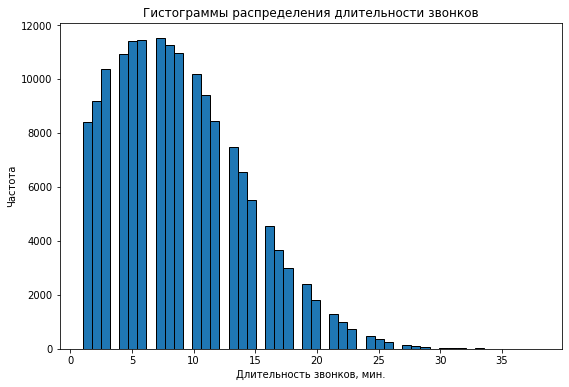

In [33]:
calls['duration'].plot(kind='hist', ec='black', bins=50, figsize=(9,6))
plt.title('Гистограммы распределения длительности звонков')
plt.xlabel('Длительность звонков, мин.')
plt.ylabel('Частота')

То же самое проделаем с мегабайтами интернета:

In [34]:
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

Построим гистограмму распределения объёмов потраченного за сессию интернет-трафика:

Text(0, 0.5, 'Частота')

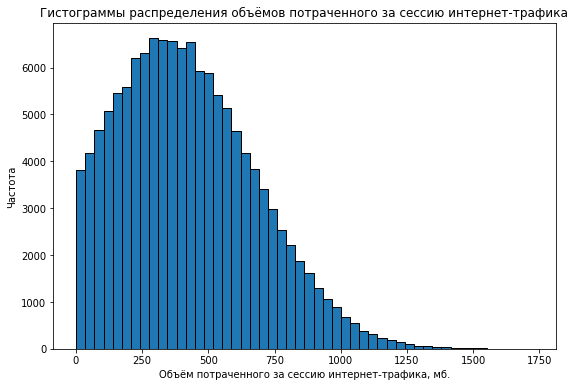

In [35]:
internet['mb_used'].plot(kind='hist', ec='black', bins=50, figsize=(9,6))
plt.title('Гистограммы распределения объёмов потраченного за сессию интернет-трафика')
plt.xlabel('Объём потраченного за сессию интернет-трафика, мб.')
plt.ylabel('Частота')

Так как в дальнейшем нам потребуется считать помесячные метрики, добавим в наши датафрейми соответствующие столбы с месяцами.

In [36]:
calls['month'] = calls['call_date'].dt.month_name()

In [37]:
messages['month'] = messages['message_date'].dt.month_name()

In [38]:
internet['month'] = internet['session_date'].dt.month_name()

## Анализ данных

### Подсчет индивидуальных характеристик для каждого пользователя

Посчитаем для каждого пользователя:  
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.  

Чтобы это сделать, прежде всего сгрупируем данные по пользователям и месяцам:

In [39]:
calls_grouped = calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()

In [40]:
calls_grouped = calls_grouped.rename(columns={'duration': 'calls_sum', 'id': 'calls_count'})

In [41]:
messages_grouped = messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()

In [42]:
messages_grouped = messages_grouped.rename(columns={'id': 'messages_count'})

In [43]:
internet_grouped = internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()

Сгруппируем все в одну таблицу:

In [44]:
df_month = calls_grouped.merge(messages_grouped, on=['user_id', 'month'], how='outer')

In [45]:
df_month = df_month.merge(internet_grouped, on=['user_id', 'month'], how='outer')

Добавим в получившуюся таблицу сведения о клиенте и каким тарифом он пользуется:

In [46]:
df_month = df_month.merge(users, on='user_id', how='left')

In [47]:
df_month.head()

,user_id,month,calls_sum,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,333.0,46.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [48]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
user_id           3214 non-null int64
month             3214 non-null object
calls_sum         3174 non-null float64
calls_count       3174 non-null float64
messages_count    2717 non-null float64
mb_used           3203 non-null float64
age               3214 non-null int64
churn_date        187 non-null datetime64[ns]
city              3214 non-null object
first_name        3214 non-null object
last_name         3214 non-null object
reg_date          3214 non-null datetime64[ns]
tariff            3214 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(5)
memory usage: 351.5+ KB


Количество записей в колонках calls_count, messages_count и mb_used отличаются друг от друга, то есть не в каждом месяце пользователи использовали не все доступные им средства общения.  
Проверим, есть ли такие клиенты, которые в каком-либо периоде не пользовались ни звонками, ни смс, ни интернетом.

In [49]:
df_month[(df_month['calls_count'].isnull()) & (df_month['messages_count'].isnull()) &
        (df_month['mb_used'].isnull())]

,user_id,month,calls_sum,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff


Таких нет, это значит, что все пользователи активны, просто в какие-то периоды они не пользовались одним из типов связи.

Теперь для каждого пользователя посчитаем помесячную выручку (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

Добавим для начала столбец абонентской платы тарифов:

In [50]:
month_price = {'smart': 550, 'ultra': 1950}

In [51]:
df_month['subscription'] = df_month['tariff'].map(month_price)

In [52]:
df_month.head()

,user_id,month,calls_sum,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,subscription
0,1000,August,408.0,52.0,81.0,14070.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
1,1000,December,333.0,46.0,70.0,9827.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
2,1000,July,340.0,47.0,75.0,14016.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
3,1000,June,172.0,43.0,60.0,23257.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950
4,1000,May,159.0,22.0,22.0,2256.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950


Добавим столбцы, в которых будет отражено сколько минут, смс и мб было использовано сверх лимита. Для этого создадим соответствующие функции:

In [53]:
def calls_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['calls_sum'] - 500
        return np.where(result > 0, result, 0)
    else:
        result = row['calls_sum'] - 3000
        return np.where(result > 0, result, 0)

In [54]:
def sms_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['messages_count'] - 50
        return np.where(result > 0, result, 0)
    else:
        result =  row['messages_count'] - 1000
        return np.where(result > 0, result, 0)

In [55]:
def internet_over_plan(row):
    if row['tariff'] == 'smart':
        result = row['mb_used'] - 15 * 1024
        return np.where(result > 0, result, 0)
    else:
        result = row['mb_used'] - 30 * 1024
        return np.where(result > 0, result, 0)

Применим эти функции к новым столбцам

In [56]:
df_month['calls_over_plan'] = df_month.apply(calls_over_plan, axis=1)

In [57]:
df_month['sms_over_plan'] = df_month.apply(sms_over_plan, axis=1)

In [58]:
df_month['internet_over_plan'] = df_month.apply(internet_over_plan, axis=1)

Посчитаем, сколько пользователи платят за дополнительные минуты, смс и трафик:

In [59]:
def month_revenue(row):
    sum_per_month = 0
    if row['tariff'] == 'smart':
        sum_per_month += np.ceil(row['calls_over_plan']) * 3
        sum_per_month += row['sms_over_plan'] * 3
        sum_per_month += np.ceil(row['internet_over_plan']/1024) * 200
        return sum_per_month
    
    else:
        sum_per_month += np.ceil(row['calls_over_plan']) * 1
        sum_per_month += row['sms_over_plan'] * 1
        sum_per_month += np.ceil(row['internet_over_plan']/1024) * 150
        return sum_per_month

In [60]:
df_month['payment_over_plan'] = df_month.apply(month_revenue, axis=1)

In [61]:
for column in ['calls_over_plan', 'internet_over_plan']:
    df_month[column] = df_month[column].astype('float')

In [62]:
for column in ['sms_over_plan', 'payment_over_plan']:
    df_month[column] = df_month[column].astype('int')

In [63]:
df_month.sample(10)

,user_id,month,calls_sum,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,subscription,calls_over_plan,sms_over_plan,internet_over_plan,payment_over_plan
690,1111,December,532.0,85.0,4.0,26834.0,43,NaT,Казань,Милана,Макарова,2018-11-16,smart,550,32.0,0,11474.0,2496
1321,1209,December,336.0,45.0,82.0,18403.0,27,NaT,Омск,Альбин,Сорокин,2018-06-02,smart,550,0.0,32,3043.0,696
2626,1414,July,371.0,54.0,59.0,19524.0,70,NaT,Владимир,Александра,Лобанова,2018-05-05,smart,550,0.0,9,4164.0,1027
1338,1211,October,448.0,58.0,20.0,18932.0,62,NaT,Калуга,Арина,Азимова,2018-06-20,smart,550,0.0,0,3572.0,800
2919,1458,October,855.0,122.0,1.0,20217.0,36,NaT,Барнаул,Роберт,Азаров,2018-02-13,ultra,1950,0.0,0,0.0,0
1457,1232,November,234.0,36.0,27.0,9708.0,60,2018-11-30,Томск,Виктория,Ларина,2018-10-07,smart,550,0.0,0,0.0,0
3101,1484,October,369.0,48.0,127.0,13848.0,55,NaT,Екатеринбург,Илзе,Абалдуева,2018-08-04,smart,550,0.0,77,0.0,231
2977,1468,July,280.0,38.0,9.0,13216.0,29,NaT,Тамбов,Иван,Авдышев,2018-02-11,smart,550,0.0,0,0.0,0
723,1116,July,286.0,48.0,NaN,15304.0,65,NaT,Петрозаводск,Альберта,Шевцова,2018-04-17,smart,550,0.0,0,0.0,0
483,1076,September,524.0,74.0,84.0,20430.0,40,NaT,Уфа,Фёдор,Шарапов,2018-03-10,smart,550,24.0,34,5070.0,1174


Чтобы посчитать помесячную выручку с каждого пользователя построчно просуммируем данные по созданным столбцам: "subscription" и "payment_over_plan":

In [64]:
df_month['revenue'] = df_month['subscription'] + df_month['payment_over_plan']

Посмотрим, что у нас вышло:

In [65]:
df_month.sample(10)

,user_id,month,calls_sum,calls_count,messages_count,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,subscription,calls_over_plan,sms_over_plan,internet_over_plan,payment_over_plan,revenue
1384,1219,March,524.0,68.0,9.0,22040.0,75,NaT,Киров,Кузьма,Некрасов,2018-01-21,smart,550,24.0,0,6680.0,1472,2022
712,1114,October,381.0,57.0,NaN,13775.0,53,NaT,Пермь,Маргарита,Колесова,2018-07-26,smart,550,0.0,0,0.0,0,550
2032,1324,September,715.0,107.0,136.0,23567.0,25,NaT,Череповец,Дайна,Березина,2018-05-28,smart,550,215.0,86,8207.0,2703,3253
619,1099,July,668.0,89.0,31.0,18684.0,67,NaT,Тольятти,Аюна,Сергеева,2018-03-16,ultra,1950,0.0,0,0.0,0,1950
1755,1282,April,725.0,109.0,79.0,10618.0,59,NaT,Ульяновск,Артём,Аракчеев,2018-01-21,smart,550,225.0,29,0.0,762,1312
1207,1189,June,613.0,87.0,17.0,17435.0,39,NaT,Санкт-Петербург,Аюна,Зубкова,2018-01-30,smart,550,113.0,0,2075.0,939,1489
2284,1366,June,166.0,23.0,19.0,4746.0,43,NaT,Санкт-Петербург,Василиса,Фетисова,2018-06-14,smart,550,0.0,0,0.0,0,550
155,1023,December,557.0,84.0,49.0,28422.0,42,NaT,Томск,Людмила,Мельникова,2018-10-22,smart,550,57.0,0,13062.0,2771,3321
2874,1453,September,808.0,125.0,63.0,21466.0,50,NaT,Москва,Кузьма,Акуленко,2018-01-01,ultra,1950,0.0,0,0.0,0,1950
493,1078,September,1101.0,153.0,NaN,22794.0,70,NaT,Волгоград,Харитон,Литвинов,2018-06-19,ultra,1950,0.0,0,0.0,0,1950


Посмотрим, сколько в целом людей пользуется тем или иным тарифом:

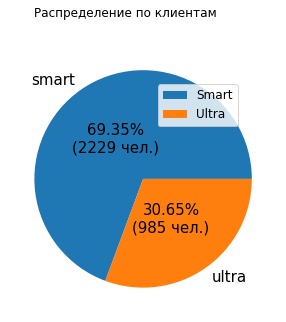

In [66]:
all_users = df_month['user_id'].count()

def func_pct(pct):
    value = float(pct/100.*all_users)
    return "{:.2f}%\n({:.0f} чел.)".format(pct, value)

axes = df_month.groupby('tariff')['user_id'].count().plot(kind='pie', subplots=True, fontsize=15,
                                                                    use_index=False, title = 'Распределение по клиентам', pctdistance=0.45,
                                                                    figsize=(20,5), autopct=lambda pct: func_pct(pct))
for ax in axes:
    ax.legend(['Smart', 'Ultra'], bbox_to_anchor=(0.87,0.87), prop={'size':12})
    ax.set_ylabel('')

Сравним суммарную годовую выручку по каждому тарифу:

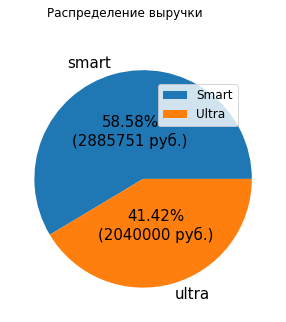

In [67]:
all_revenue = df_month['revenue'].sum()

def func_pct(pct):
    value = float(pct/100.*all_revenue)
    return "{:.2f}%\n({:.0f} руб.)".format(pct, value)

axes = df_month.groupby('tariff')['revenue'].sum().plot(kind='pie', subplots=True, fontsize=15,
                                                                    use_index=False, title = 'Распределение выручки', pctdistance=0.45,
                                                                    figsize=(20,5), autopct=lambda pct: func_pct(pct))
for ax in axes:
    ax.legend(['Smart', 'Ultra'], bbox_to_anchor=(0.87,0.87), prop={'size':12})
    ax.set_ylabel('')

69% выборки предпочитают более дешевый тариф "Smart". Больше клиентов - больше выручка, даже не смотря на то, что абонентская плата по тарифу "Ultra" в 3 раза выше.

### Изучение поведения клиентов 

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

Посчитаем, сколько в среднем каждому пользователю требуется минут, сообщений и мегабайт в месяц (т.к. присутствуют выбросы будем использовать медиану)

In [68]:
medians = df_month.pivot_table(index='user_id', values=['calls_sum', 'messages_count', 'mb_used', 'revenue'], aggfunc='median')
for user_id in users['user_id']:
    medians.loc[user_id, 'tariff'] = users.loc[user_id-1000, 'tariff']
medians.head()

,calls_sum,mb_used,messages_count,revenue,tariff
user_id,,,,,
1000,339.0,14325.5,65.0,1950.0,ultra
1001,422.0,16252.5,NaN,950.0,smart
1002,214.0,17601.0,11.0,1150.0,smart
1003,824.0,11368.0,83.0,1950.0,ultra
1004,132.5,17828.5,154.5,1950.0,ultra


Найдем медиану, дисперсию и стандартное отклонение:

In [69]:
stat = medians.pivot_table(index=['tariff'], values=['calls_sum', 'messages_count', 'mb_used'], 
                    aggfunc={'calls_sum': [np.median, np.var, np.std], 
                             'messages_count': [np.median, np.var, np.std], 
                             'mb_used': [np.median, np.var, np.std]})
stat

calls_sum                            mb_used               \
          median         std           var   median          std   
tariff                                                             
smart      440.0  158.761565  25205.234463  16985.0  4179.487232   
ultra      546.0  290.153182  84188.868930  19826.0  8764.807621   

                     messages_count                          
                 var         median        std          var  
tariff                                                       
smart   1.746811e+07          33.75  26.388103   696.331954  
ultra   7.682185e+07          59.00  46.198408  2134.292863

Посмотрим, как выглядят диаграммы рассеивания и гистограммы длительности звонков, количества смс и интернет-трафика для этих тарифов.

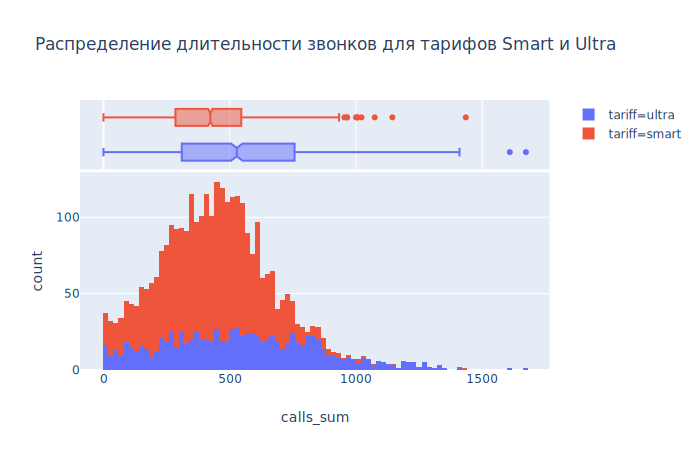

In [83]:
fig = px.histogram(df_month, x = 'calls_sum', color = 'tariff', marginal = 'box',
                  title = 'Распределение длительности звонков для тарифов Smart и Ultra')
fig.show(renderer='svg')

В среднем пользователи тарифа "Smart" разговаривают 285-546 мин. в месяц. Медиана равна 440 мин. Клиентам данного тарифа доступно 500 мин общения в месяц. Таким образом они используют почти полный свой лимит.  
Пользователи тарифа "Ultra" в среднем разговаривают 310-756 мин. в месяц. Медиана равна 546 мин. Клиентам данного тарифа доступно 3000 мин общения в месяц. Видимо клиенты выбирают этот тариф вовсе не за большой пакет минут.

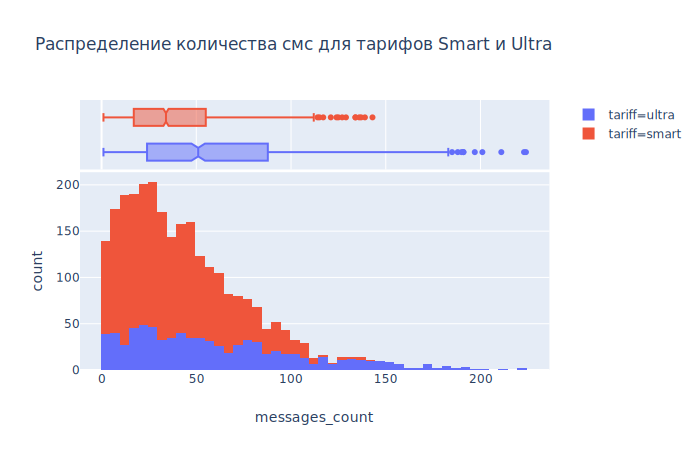

In [84]:
fig = px.histogram(df_month, x = 'messages_count', color = 'tariff', marginal = 'box',
                  title = 'Распределение количества смс для тарифов Smart и Ultra')
fig.show(renderer='svg')

Пользователи тарифа "Smart" отправляют в среднем от 17 до 55 смс в месяц, медиана - 34 (доступно 50). Как и в ситуации со звонками, клиенты стараются по максимуму использовать свой тариф.  
Пользователи тарифа "Ultra" отправляют в среднем от 24 до 88 смс в месяц, медиана - 51 (доступно 1000). Клиенты этого тарифа не используют все возможности своего тарифа.

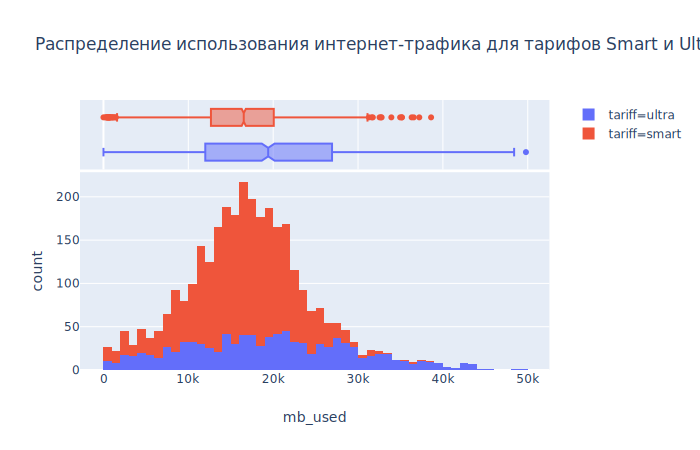

In [85]:
fig = px.histogram(df_month, x = 'mb_used', color = 'tariff', marginal = 'box',
                  title = 'Распределение использования интернет-трафика для тарифов Smart и Ultra')
fig.show(renderer='svg')

Пользователи тарифа "Smart" используют в среднем от 12665 мб (12,37 Гб) до 20068 мб (19,6 Гб) интернет-трафика в месяц, медиана - 16532 мб (16,14 Гб),доступно 15 Гб. Клиентам данного тарифа зачастую не хватает трафика интернета.
Пользователи тарифа "Ultra" используют в среднем от 11999 мб (11,72 Гб) до 26936 мб (26,3 Гб) интернет-трафика в месяц, медиана - 19411 мб (18,96 Гб),доступно 30 Гб.

## Проверка гипотезы

### Гипотеза 1

**H0 (нулевая гипотеза)** — средняя выручка пользователей тарифа «Ultra» равна средней выручке пользователей тарифа «Smart».  
**H1 (альтернативная гипотеза)** — средняя выручка пользователей тарифов «Ultra» и «Smart» различаются.

In [73]:
users_smart = df_month.query('tariff == "smart"')['revenue']

In [74]:
users_ultra = df_month.query('tariff == "ultra"')['revenue']

In [75]:
from scipy import stats as st
alpha = 0.05
results = st.ttest_ind(users_smart, users_ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


Судя по всему, средняя выручка пользователей тарифов «Ultra» и «Smart» различаются.

In [76]:
df_month.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1038
ultra,1950


Все таки средняя выручка за счет высокой абонентской платы у тарифа «Ultra» выше.

### Гипотеза 2

**H0 (нулевая гипотеза)** — средняя выручка пользователей из Москвы  не отличается от выручки пользователей из других регионов.  
**H1 (альтернативная гипотеза)** — средняя выручка пользователей из Москвы и из других городов различаются.

In [77]:
moscow = df_month.query('city == "Москва"')['revenue']

In [78]:
regions = df_month.query('city != "Москва"')['revenue']

In [79]:
alpha = 0.05
results = st.ttest_ind(moscow, regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


In [80]:
def region_group(city):
    if city == 'Москва': return 'Москва'
    else: return 'Другой регион'

In [81]:
df_month['region'] = df_month['city'].apply(region_group)

In [82]:
df_month.pivot_table(index='region', values='revenue', aggfunc='median')

,revenue
region,
Другой регион,1587
Москва,1750


Данный статистический тест не дал возможности опровергунть исходную гипотезу о том, что доходы от пользователей из Москвы и из других регионов равны. Действительно, доходы в Москве практически не отличаются от других населенных пунктов.

## Общий вывод

69% выборки предпочитают более дешевый тариф "Smart". Эта категория клиентов приносит компании 58,6% годовой выручки. Это происходит за счет того, что пользователям тарифа "Smart" не хватает пакетов минут, смс и интернет-трафика и они вынуждены покупать их дополнительно.  
Тарифом "Ultra" пользуется лишь 31% при этом они не используют полный потенциал по минутам, смс и интернет-трафику. Доля этого сектора в годовой выручке составляет 41,4%. Однако средняя выручка от этого тарифа выше: 1950 руб. против 1038 руб.  
В сложившейся ситуации компании можно предложить разработать некий промежуточный тариф.  
Средние доходы от пользователей в Москве не отличаются от доходов в других населенных пунктах: разница статистически незначима (p-значение: 0,531) и составляет 163 руб.: 1750 руб. в Москве против 1587 руб в других населенных пунктах.  
